<a href="https://colab.research.google.com/github/PriyadharshiniGanesh/Customer-Behavior-Analysis/blob/main/Project_Customerbehaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# New Section

In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving engagement_data.csv to engagement_data.csv
Saving geography.csv to geography.csv
Saving products.csv to products.csv
{'engagement_data.csv': b'EngagementID,ContentID,ContentType,Likes,EngagementDate,CampaignID,ProductID,ViewsClicksCombined\r\n1,39,Blog,190,2023-08-30,1,9,1883-671\r\n2,48,Blog,114,2023-03-28,18,20,5280-532\r\n3,16,video,32,2023-12-08,7,14,1905-204\r\n4,43,Video,17,2025-01-21,19,20,2766-257\r\n5,16,newsletter,306,2024-02-21,6,15,5116-1524\r\n6,32,Socialmedia,648,2023-06-18,18,19,8237-1641\r\n7,33,SOCIALMEDIA,1,2025-10-01,12,2,750-34\r\n8,47,Blog,1,2025-03-31,17,6,891-35\r\n9,48,blog,123,2024-03-19,13,16,5571-1527\r\n10,4,Blog,25,2023-12-03,15,15,4279-297\r\n11,38,Socialmedia,29,2024-05-26,19,6,4297-234\r\n12,29,socialmedia,396,2023-06-15,3,10,7877-2037\r\n13,14,video,12,2025-02-04,12,18,1796-136\r\n14,2,Socialmedia,317,2023-08-26,16,2,6837-2251\r\n15,16,Socialmedia,0,2025-10-20,6,19,36-1\r\n16,2,SOCIALMEDIA,276,2023-07-06,17,16,5980-1227\r\n17,35,BLOG,9,2024-05-17

In [ ]:
journey_df = pd.read_csv('customer_journey.csv')
journey_df

,JourneyID,CustomerID,ProductID,VisitDate,Stage,Action,Duration
0,1,64,18,2024-06-10,Checkout,Drop-off,NaN
1,2,94,11,2025-07-09,Checkout,Drop-off,NaN
2,3,34,8,2024-06-14,ProductPage,View,235.0
3,4,33,18,2025-05-28,Checkout,Drop-off,NaN
4,5,91,10,2023-02-11,Homepage,Click,156.0
...,...,...,...,...,...,...,...
95,96,22,9,2024-07-28,ProductPage,View,212.0
96,97,92,19,2025-05-26,homepage,View,203.0
97,98,95,8,2025-05-25,Homepage,Click,68.0
98,99,58,16,2024-07-06,Checkout,Purchase,87.0


In [ ]:
print(journey_df.isnull().sum())

JourneyID      0
CustomerID     0
ProductID      0
VisitDate      0
Stage          0
Action         0
Duration      14
dtype: int64


In [ ]:
journey_df1 = journey_df.fillna(journey_df.mean(numeric_only = True))
journey_df1

,JourneyID,CustomerID,ProductID,VisitDate,Stage,Action,Duration
0,1,64,18,2024-06-10,Checkout,Drop-off,166.534884
1,2,94,11,2025-07-09,Checkout,Drop-off,166.534884
2,3,34,8,2024-06-14,ProductPage,View,235.000000
3,4,33,18,2025-05-28,Checkout,Drop-off,166.534884
4,5,91,10,2023-02-11,Homepage,Click,156.000000
...,...,...,...,...,...,...,...
95,96,22,9,2024-07-28,ProductPage,View,212.000000
96,97,92,19,2025-05-26,homepage,View,203.000000
97,98,95,8,2025-05-25,Homepage,Click,68.000000
98,99,58,16,2024-07-06,Checkout,Purchase,87.000000


In [ ]:
review_df = pd.read_csv('customer_reviews.csv')
review_df

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
0,1,77,18,2023-12-23,3,"Average experience, nothing special."
1,2,80,19,2024-12-25,5,The quality is top-notch.
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper."
4,5,64,2,2023-07-16,3,"Average experience, nothing special."
...,...,...,...,...,...,...
95,96,19,13,2023-09-02,3,"Good quality, but could be cheaper."
96,97,64,6,2024-01-19,3,"The product is okay, but the instruction..."
97,98,96,3,2025-11-20,5,Exceeded my expectations!
98,99,79,16,2025-01-29,2,"Average experience, nothing special."


In [ ]:
customers_df = pd.read_csv('customers.csv')
customers_df

,CustomerID,CustomerName,Email,Gender,Age,GeographyID
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2
1,2,Sarah Brown,sarah.brown@example.com,Female,37,4
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6
3,4,David Garcia,david.garcia@example.com,Male,25,8
4,5,Emma Miller,emma.miller@example.com,Female,41,4
...,...,...,...,...,...,...
95,96,Emily Gonzalez,emily.gonzalez@example.com,Female,38,10
96,97,Emily Rodriguez,emily.rodriguez@example.com,Female,51,3
97,98,Chris Lopez,chris.lopez@example.com,Female,55,10
98,99,Laura Hernandez,laura.hernandez@example.com,Male,41,5


In [ ]:
engagement_df = pd.read_csv('engagement_data.csv')
engagement_df

,EngagementID,ContentID,ContentType,Likes,EngagementDate,CampaignID,ProductID,ViewsClicksCombined
0,1,39,Blog,190,2023-08-30,1,9,1883-671
1,2,48,Blog,114,2023-03-28,18,20,5280-532
2,3,16,video,32,2023-12-08,7,14,1905-204
3,4,43,Video,17,2025-01-21,19,20,2766-257
4,5,16,newsletter,306,2024-02-21,6,15,5116-1524
...,...,...,...,...,...,...,...,...
95,96,17,Blog,32,2024-07-15,14,13,712-142
96,97,34,blog,3,2025-07-01,16,7,696-47
97,98,44,blog,0,2025-08-20,11,8,231-10
98,99,26,Blog,119,2024-04-15,17,4,3511-479


In [ ]:
geography_df = pd.read_csv('geography.csv')
geography_df

,GeographyID,Country,City
0,1,UK,London
1,2,Germany,Berlin
2,3,France,Paris
3,4,Spain,Madrid
4,5,Italy,Rome
5,6,Netherlands,Amsterdam
6,7,Belgium,Brussels
7,8,Sweden,Stockholm
8,9,Switzerland,Zurich
9,10,Austria,Vienna


In [ ]:
product_df = pd.read_csv('products.csv')
product_df

,ProductID,ProductName,Category,Price
0,1,Running Shoes,Sports,223.75
1,2,Fitness Tracker,Sports,196.68
2,3,Yoga Mat,Sports,485.32
3,4,Dumbbells,Sports,26.21
4,5,Soccer Ball,Sports,41.26
5,6,Tennis Racket,Sports,36.07
6,7,Basketball,Sports,225.12
7,8,Football Helmet,Sports,44.75
8,9,Baseball Glove,Sports,327.36
9,10,Golf Clubs,Sports,81.59


In [19]:
# Best performing product per region
cust_geo= pd.merge(geography_df, customers_df, on = "GeographyID")
cust_geo

,GeographyID,Country,City,CustomerID,CustomerName,Email,Gender,Age
0,1,UK,London,13,David Wilson,david.wilson@example.com,Male,50
1,1,UK,London,20,David Johnson,david.johnson@example.com,Male,22
2,1,UK,London,26,Isabella Thomas,isabella.thomas@example.com,Male,31
3,1,UK,London,27,John Rodriguez,john.rodriguez@example.com,Male,23
4,1,UK,London,42,John Gonzalez,john.gonzalez@example.com,Female,69
...,...,...,...,...,...,...,...,...
95,10,Austria,Vienna,76,Michael Lopez,michael.lopez@example.com,Female,26
96,10,Austria,Vienna,86,James Hernandez,james.hernandez@example.com,Male,63
97,10,Austria,Vienna,96,Emily Gonzalez,emily.gonzalez@example.com,Female,38
98,10,Austria,Vienna,98,Chris Lopez,chris.lopez@example.com,Female,55


In [20]:
cust_geo_journey = pd.merge(cust_geo, journey_df1, on = "CustomerID")
cust_geo_journey

,GeographyID,Country,City,CustomerID,CustomerName,Email,Gender,Age,JourneyID,ProductID,VisitDate,Stage,Action,Duration
0,1,UK,London,13,David Wilson,david.wilson@example.com,Male,50,38,18,2023-02-23,ProductPage,View,227.000000
1,1,UK,London,20,David Johnson,david.johnson@example.com,Male,22,73,16,2024-09-17,Homepage,View,17.000000
2,1,UK,London,42,John Gonzalez,john.gonzalez@example.com,Female,69,62,1,2024-10-22,Homepage,View,186.000000
3,1,UK,London,42,John Gonzalez,john.gonzalez@example.com,Female,69,76,17,2025-05-29,Checkout,Purchase,261.000000
4,1,UK,London,55,Emily Lopez,emily.lopez@example.com,Female,60,34,15,2023-10-26,Homepage,View,233.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10,Austria,Vienna,51,Michael Davis,michael.davis@example.com,Female,63,63,15,2025-05-22,Homepage,View,139.000000
96,10,Austria,Vienna,58,Jane Williams,jane.williams@example.com,Male,34,21,20,2024-03-07,Checkout,Drop-off,166.534884
97,10,Austria,Vienna,58,Jane Williams,jane.williams@example.com,Male,34,23,1,2023-07-05,Homepage,View,48.000000
98,10,Austria,Vienna,58,Jane Williams,jane.williams@example.com,Male,34,99,16,2024-07-06,Checkout,Purchase,87.000000


In [21]:
cust_geo_journey = pd.merge(cust_geo, journey_df1, on = "CustomerID")
cust_geo_journey

,GeographyID,Country,City,CustomerID,CustomerName,Email,Gender,Age,JourneyID,ProductID,VisitDate,Stage,Action,Duration
0,1,UK,London,13,David Wilson,david.wilson@example.com,Male,50,38,18,2023-02-23,ProductPage,View,227.000000
1,1,UK,London,20,David Johnson,david.johnson@example.com,Male,22,73,16,2024-09-17,Homepage,View,17.000000
2,1,UK,London,42,John Gonzalez,john.gonzalez@example.com,Female,69,62,1,2024-10-22,Homepage,View,186.000000
3,1,UK,London,42,John Gonzalez,john.gonzalez@example.com,Female,69,76,17,2025-05-29,Checkout,Purchase,261.000000
4,1,UK,London,55,Emily Lopez,emily.lopez@example.com,Female,60,34,15,2023-10-26,Homepage,View,233.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10,Austria,Vienna,51,Michael Davis,michael.davis@example.com,Female,63,63,15,2025-05-22,Homepage,View,139.000000
96,10,Austria,Vienna,58,Jane Williams,jane.williams@example.com,Male,34,21,20,2024-03-07,Checkout,Drop-off,166.534884
97,10,Austria,Vienna,58,Jane Williams,jane.williams@example.com,Male,34,23,1,2023-07-05,Homepage,View,48.000000
98,10,Austria,Vienna,58,Jane Williams,jane.williams@example.com,Male,34,99,16,2024-07-06,Checkout,Purchase,87.000000


In [22]:
successfull_purchase = cust_geo_journey[cust_geo_journey["Action"] != "Drop-off"]
product_performance = (
    successfull_purchase.groupby(["Country", "City","ProductID"])
    .size()
    .reset_index(name = "PurchaseCount")
)
product_performance

,Country,City,ProductID,PurchaseCount
0,Austria,Vienna,1,3
1,Austria,Vienna,4,1
2,Austria,Vienna,15,1
3,Austria,Vienna,16,1
4,Austria,Vienna,20,2
...,...,...,...,...
64,UK,London,15,1
65,UK,London,16,1
66,UK,London,17,1
67,UK,London,18,1


In [23]:
best_products = product_performance.loc[
    product_performance.groupby(["Country", "City"])["PurchaseCount"].idxmax()
]
best_products

,Country,City,ProductID,PurchaseCount
0,Austria,Vienna,1,3
6,Belgium,Brussels,2,2
11,France,Paris,4,1
17,Germany,Berlin,2,1
26,Italy,Rome,10,3
34,Netherlands,Amsterdam,15,2
40,Spain,Madrid,8,3
48,Sweden,Stockholm,12,1
58,Switzerland,Zurich,18,3
68,UK,London,19,2


In [24]:
best_products_region =  pd.DataFrame(best_products, columns  = ['Country', 'City', 'ProductID', 'PurchaseCount'])
print(best_products_region)

        Country       City  ProductID  PurchaseCount
0       Austria     Vienna          1              3
6       Belgium   Brussels          2              2
11       France      Paris          4              1
17      Germany     Berlin          2              1
26        Italy       Rome         10              3
34  Netherlands  Amsterdam         15              2
40        Spain     Madrid          8              3
48       Sweden  Stockholm         12              1
58  Switzerland     Zurich         18              3
68           UK     London         19              2


In [25]:
 ## review trend with product performance

# sentiment analysis
complaints = review_df.groupby(["ProductID","ReviewText"])["Rating"].mean().reset_index().sort_values(by='Rating', ascending=False)
key_complaints = complaints.tail(10)
key_complaints

,ProductID,ReviewText,Rating
53,13,"Average experience, nothing special.",3.0
72,17,"Average experience, nothing special.",2.5
66,16,"Average experience, nothing special.",2.0
41,10,Disappointed with the performance.,2.0
8,2,Product did not meet my expectations.,2.0
31,7,"The product is okay, but the instructi...",2.0
65,15,The product arrived late.,2.0
13,3,Not worth the money.,1.0
20,4,The product stopped working after a month.,1.0
27,6,I had a bad experience with this product.,1.0


In [26]:
com_product = pd.merge(key_complaints, product_df, on = "ProductID")
com_product

,ProductID,ReviewText,Rating,ProductName,Category,Price
0,13,"Average experience, nothing special.",3.0,Swim Goggles,Sports,145.97
1,17,"Average experience, nothing special.",2.5,Surfboard,Sports,275.43
2,16,"Average experience, nothing special.",2.0,Kayak,Sports,259.40
3,10,Disappointed with the performance.,2.0,Golf Clubs,Sports,81.59
4,2,Product did not meet my expectations.,2.0,Fitness Tracker,Sports,196.68
5,7,"The product is okay, but the instructi...",2.0,Basketball,Sports,225.12
6,15,The product arrived late.,2.0,Climbing Rope,Sports,410.17
7,3,Not worth the money.,1.0,Yoga Mat,Sports,485.32
8,4,The product stopped working after a month.,1.0,Dumbbells,Sports,26.21
9,6,I had a bad experience with this product.,1.0,Tennis Racket,Sports,36.07


In [27]:
complaints_journey = pd.merge(key_complaints, journey_df1)
complaints_journey

,ProductID,ReviewText,Rating,JourneyID,CustomerID,VisitDate,Stage,Action,Duration
0,13,"Average experience, nothing special.",3.0,14,14,2025-11-01,ProductPage,View,13.000000
1,13,"Average experience, nothing special.",3.0,48,52,2025-02-01,Homepage,View,241.000000
2,13,"Average experience, nothing special.",3.0,74,81,2024-09-26,Homepage,Click,291.000000
3,17,"Average experience, nothing special.",2.5,29,12,2025-06-01,Homepage,View,205.000000
4,17,"Average experience, nothing special.",2.5,37,38,2024-06-18,Checkout,Drop-off,166.534884
5,17,"Average experience, nothing special.",2.5,70,75,2023-07-07,Homepage,View,297.000000
6,17,"Average experience, nothing special.",2.5,76,42,2025-05-29,Checkout,Purchase,261.000000
7,17,"Average experience, nothing special.",2.5,78,46,2025-06-15,Checkout,Purchase,122.000000
8,16,"Average experience, nothing special.",2.0,10,44,2025-04-23,ProductPage,View,30.000000
9,16,"Average experience, nothing special.",2.0,16,14,2024-07-17,Homepage,View,46.000000


In [28]:
engagement_df['ContentType'] = engagement_df['ContentType'].str.lower()
journey_df1['Stage'] = journey_df1['Stage'].str.lower()
journey_df1['Action'] = journey_df1['Action'].str.lower()

In [29]:
# common action leading to successful conversion

successful_purchases = journey_df1[journey_df1['Action'] == 'purchase']
successful_purchases

,JourneyID,CustomerID,ProductID,VisitDate,Stage,Action,Duration
35,36,17,2,2023-11-20,checkout,purchase,137.0
75,76,42,17,2025-05-29,checkout,purchase,261.0
77,78,46,17,2025-06-15,checkout,purchase,122.0
80,81,89,15,2025-10-27,checkout,purchase,246.0
83,84,79,15,2025-03-09,checkout,purchase,48.0
98,99,58,16,2024-07-06,checkout,purchase,87.0


In [30]:
merged_data = pd.merge(successful_purchases, engagement_df, on='ProductID')
merged_data

,JourneyID,CustomerID,ProductID,VisitDate,Stage,Action,Duration,EngagementID,ContentID,ContentType,Likes,EngagementDate,CampaignID,ViewsClicksCombined
0,36,17,2,2023-11-20,checkout,purchase,137.0,7,33,socialmedia,1,2025-10-01,12,750-34
1,36,17,2,2023-11-20,checkout,purchase,137.0,14,2,socialmedia,317,2023-08-26,16,6837-2251
2,36,17,2,2023-11-20,checkout,purchase,137.0,78,44,socialmedia,2,2025-06-07,17,713-44
3,36,17,2,2023-11-20,checkout,purchase,137.0,81,30,newsletter,11,2024-06-30,11,581-117
4,36,17,2,2023-11-20,checkout,purchase,137.0,83,48,video,14,2025-02-20,9,1933-158
5,36,17,2,2023-11-20,checkout,purchase,137.0,87,8,blog,111,2024-07-27,2,3142-602
6,76,42,17,2025-05-29,checkout,purchase,261.0,30,29,newsletter,14,2024-09-10,20,1010-196
7,76,42,17,2025-05-29,checkout,purchase,261.0,51,44,newsletter,44,2025-02-25,6,2725-358
8,76,42,17,2025-05-29,checkout,purchase,261.0,54,40,blog,0,2025-09-22,13,706-34
9,76,42,17,2025-05-29,checkout,purchase,261.0,93,23,socialmedia,147,2023-02-19,1,2989-1283


In [31]:
purchase_by_content = merged_data['ContentType'].value_counts().reset_index()

purchase_by_content.columns = ['ContentType', 'PurchaseCount']
purchase_by_content

,ContentType,PurchaseCount
0,newsletter,11
1,video,11
2,blog,9
3,socialmedia,7


In [32]:
total_engagements = engagement_df['ContentType'].value_counts().reset_index()
total_engagements

,ContentType,count
0,video,31
1,blog,28
2,socialmedia,24
3,newsletter,17


In [33]:
conversion_rates = pd.merge(purchase_by_content, total_engagements, on='ContentType', how='left')
conversion_rates['ConversionRate'] = (conversion_rates['PurchaseCount'] / conversion_rates['count']) * 100
conversion_rates['ConversionRate']

,ConversionRate
0,64.705882
1,35.483871
2,32.142857
3,29.166667


In [34]:

print("\nConversion Rates by Content Type:")
print(conversion_rates.sort_values('ConversionRate', ascending=False))



Conversion Rates by Content Type:
   ContentType  PurchaseCount  count  ConversionRate
0   newsletter             11     17       64.705882
1        video             11     31       35.483871
2         blog              9     28       32.142857
3  socialmedia              7     24       29.166667


In [35]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Number of Purchases')

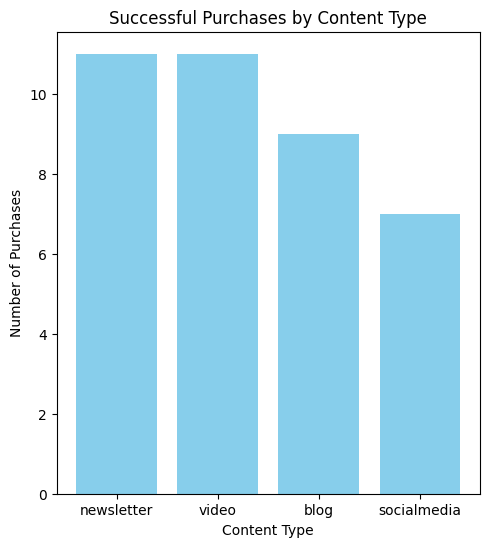

In [36]:
# Plot 1: Successful purchases by content type
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.bar(purchase_by_content['ContentType'], purchase_by_content['PurchaseCount'], color='skyblue')
plt.title('Successful Purchases by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Number of Purchases')

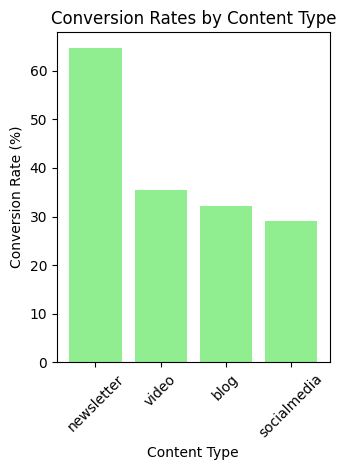

In [37]:
# Plot 2: Conversion rates by content type
plt.subplot(1, 2, 2)
plt.bar(conversion_rates['ContentType'], conversion_rates['ConversionRate'], color='lightgreen')
plt.title('Conversion Rates by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()